In [1]:
import scipy as sp
import numpy as np
from matplotlib import font_manager, rc
rc('font', family="AppleMyungjo")

In [2]:
pmf = np.array([[1, 2, 1, 0, 0, 0],
                [0, 2, 3, 1, 0, 0],
                [0, 4, 7, 4, 1, 0],
                [0, 1, 4, 5, 4, 0],
                [0, 0, 1, 3, 2, 0],
                [0, 0, 0, 1, 2, 1]])
pmf = pmf/pmf.sum()
pmf

array([[ 0.02,  0.04,  0.02,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.04,  0.06,  0.02,  0.  ,  0.  ],
       [ 0.  ,  0.08,  0.14,  0.08,  0.02,  0.  ],
       [ 0.  ,  0.02,  0.08,  0.1 ,  0.08,  0.  ],
       [ 0.  ,  0.  ,  0.02,  0.06,  0.04,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.02,  0.04,  0.02]])

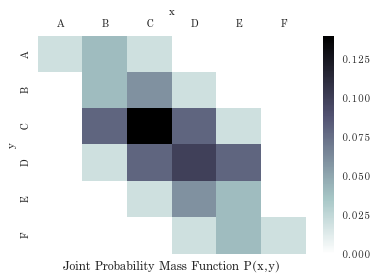

In [3]:
ax = sns.heatmap(pmf, cmap=mpl.cm.bone_r,
                xticklabels=['A', 'B', 'C', 'D', 'E', 'F'],
                yticklabels=['A', 'B', 'C', 'D', 'E', 'F'])
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Joint Probability Mass Function P(x,y)", y=-0.1)
plt.show()

In [4]:
### 연습문제 1

0.02
0
(C,C)

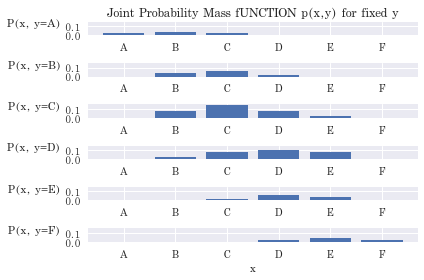

In [5]:
x = np.arange(6)
plt.subplot(611); plt.bar(x, pmf[0, :]); plt.ylabel("P(x, y=A)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("Joint Probability Mass fUNCTION p(x,y) for fixed y")

plt.subplot(612); plt.bar(x, pmf[1, :]); plt.ylabel("P(x, y=B)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])

plt.subplot(613); plt.bar(x, pmf[2, :]); plt.ylabel("P(x, y=C)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])

plt.subplot(614); plt.bar(x, pmf[3, :]); plt.ylabel("P(x, y=D)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])

plt.subplot(615); plt.bar(x, pmf[4, :]); plt.ylabel("P(x, y=E)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])

plt.subplot(616); plt.bar(x, pmf[5, :]); plt.ylabel("P(x, y=F)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])

plt.xlabel("x")
plt.tight_layout()
plt.show()

In [6]:
### 주변확률질량함수

In [7]:
pmf_marginal_x = pmf.sum(axis=0)
pmf_marginal_x


array([ 0.02,  0.18,  0.32,  0.28,  0.18,  0.02])

In [8]:
pmf_marginal_y = pmf.sum(axis=1)
pmf_marginal_y[:, np.newaxis]

array([[ 0.08],
       [ 0.12],
       [ 0.32],
       [ 0.28],
       [ 0.12],
       [ 0.08]])

In [9]:
### 조건부 확률질량함수

In [10]:
pmf[0, :]

array([ 0.02,  0.04,  0.02,  0.  ,  0.  ,  0.  ])

In [11]:
np.sum(pmf[0,:])

0.080000000000000002

In [12]:
cond_y0 = pmf[0, :]/pmf_marginal_y[0]    #<- PXY(x, y=0) / PY(y=0)
cond_y0

array([ 0.25,  0.5 ,  0.25,  0.  ,  0.  ,  0.  ])

In [13]:
np.sum(cond_y0)

1.0

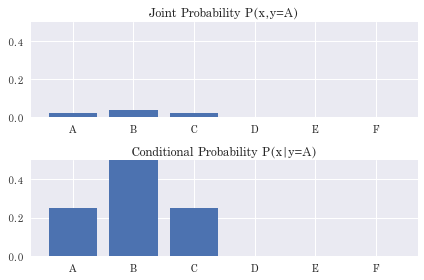

In [14]:
plt.subplot(211); plt.bar(x, pmf[0, :]); plt.ylim(0, 0.5)
plt.xticks(range(6), ['A', 'B', 'C','D', 'E', 'F'])
plt.title("Joint Probability P(x,y=A)")
plt.subplot(212); plt.bar(x, cond_y0); plt.ylim(0, 0.5)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("Conditional Probability P(x|y=A)")
plt.tight_layout()
plt.show()

In [15]:
pmf[1, :]

array([ 0.  ,  0.04,  0.06,  0.02,  0.  ,  0.  ])

In [16]:
np.sum(pmf[1, :])

0.12000000000000001

In [17]:
cond_y1 = pmf[1, :] / pmf_marginal_y[1]
cond_y1

array([ 0.        ,  0.33333333,  0.5       ,  0.16666667,  0.        ,  0.        ])

In [18]:
np.sum(cond_y1)

0.99999999999999989

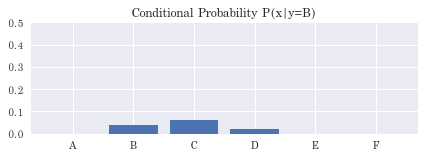

In [19]:
y = np.arange(6)
plt.subplot(211); plt.bar(y, pmf[1, :]); plt.ylim(0, 0.5)
plt.xticks(range(6), ['A', 'B','C', 'D', 'E', 'F'])
plt.title("Conditional Probability P(x|y=B)")
plt.tight_layout()
plt.show()

##### 다변수 연속확률변수의 결합/조건부확률

In [20]:
### 결합 누적확률분포함수

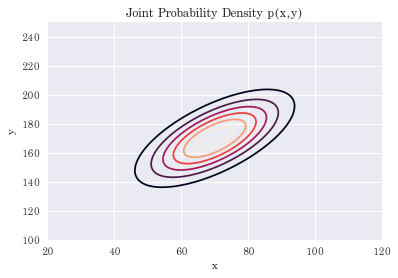

In [21]:
mu = [70, 170]
cov = [[150, 140], [140, 300]]   #<- covariance matrix
rv = sp.stats.multivariate_normal(mu, cov)

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 100)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
plt.contour(XX, YY, ZZ)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Joint Probability Density p(x,y)")
plt.show()

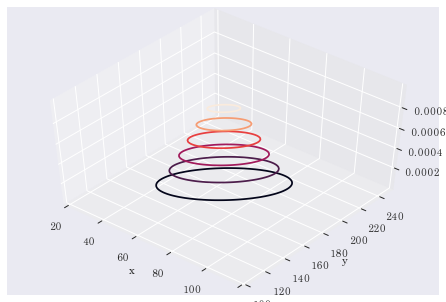

In [22]:
from mpl_toolkits.mplot3d import Axes3D  #<- 3D로 그래프 그리기
fig = plt.figure()
ax = Axes3D(fig)
ax.contour(XX, YY, ZZ)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(20, 120)
ax.set_ylim(100, 250)
ax.view_init(50, -50)
plt.show()

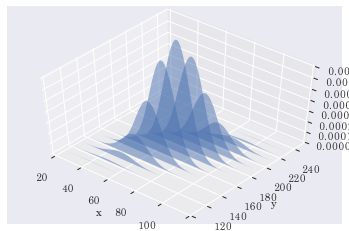

In [23]:
### 고정된 y값에 대한 확률밀도함수의 단면 표시하기

from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 16)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))

fig = plt.figure()
ax = fig.gca(projection='3d')

xs = np.hstack([0, xx, 0])
zs = np.zeros_like(xs)
verts = []
for i, y in enumerate(yy):
    zs[1:-1] = ZZ[i]
    verts.append(list(zip(xx, zs)))
    
poly  = PolyCollection(verts)
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=yy, zdir='y')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(20, 120)
ax.set_ylim(100, 250)
ax.set_zlabel('z')
ax.set_zlim3d(0, 0.0007)
ax.view_init(50, -50)
plt.show()

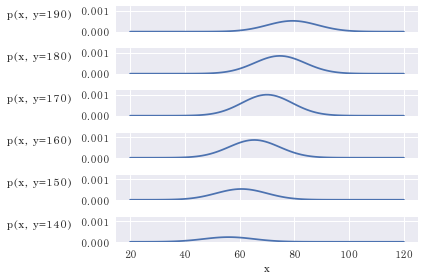

In [24]:
for i, j in enumerate(range(9, 3, -1)):
    ax = plt.subplot(6, 1, i+1)
    plt.plot(xx, ZZ[j, :])
    plt.ylim(0, 0.0012)
    if i<5:
        ax.xaxis.set_ticklabels([])
    plt.ylabel("p(x, y={:.0f})".format(yy[j]), rotation=0, labelpad=40)
plt.xlabel("x")
plt.tight_layout()
plt.show()

In [25]:
### 주변 확률 밀도 함수

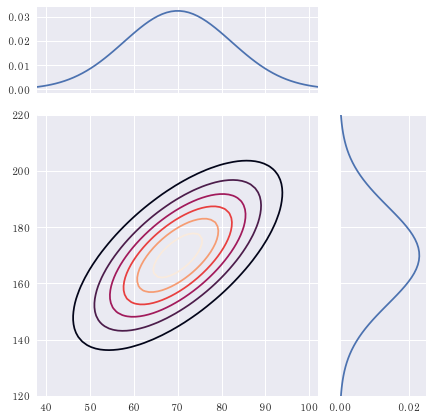

In [34]:
from matplotlib.ticker import NullFormatter
from matplotlib import transforms
from scipy.integrate import simps

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 100)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
fx = [simps(Z, yy) for Z in ZZ.T]
fy = [simps(Z, xx) for Z in ZZ]

plt.figure(figsize=(6,6))

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.05

rect1 = [left, bottom, width, height]
rect2 = [left, bottom_h, width, 0.2]
rect3 = [left_h, bottom, 0.2, height]

ax1 = plt.axes(rect1)
ax2 = plt.axes(rect2)
ax3 = plt.axes(rect3)

ax2.xaxis.set_major_formatter(NullFormatter())
ax3.yaxis.set_major_formatter(NullFormatter())

ax1.contour(XX, YY, ZZ)
ax2.plot(xx, fx)
base = ax3.transData
rot = transforms.Affine2D().rotate_deg(-90)
plt.plot(-yy, fy, transform=rot + base)

ax1.set_xlim(38, 102)
ax1.set_ylim(120, 220)
ax2.set_xlim(38, 102)
ax3.set_xlim(0, 0.025)
ax3.set_ylim(120, 220)

plt.show()

In [ ]:
### 조건부 확률밀도함수

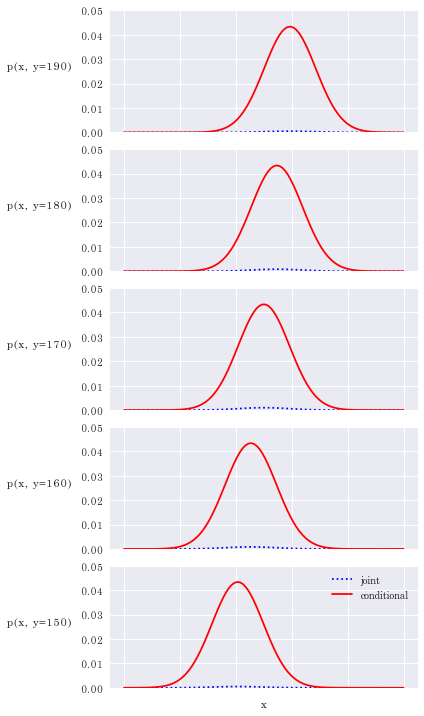

In [37]:
from scipy.integrate import simps

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 16)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))

plt.figure(figsize=(6,10))

for i, j in enumerate(range(9, 4, -1)):
    ax = plt.subplot(5, 1, i+1)
    plt.plot(xx, ZZ[j, :], 'b:', label="joint")
    marginal = simps(ZZ[j, :], xx)
    plt.plot(xx, ZZ[j, :] / marginal, 'r-', label="conditional")
    plt.ylim(0, 0.05)
    ax.xaxis.set_ticklabels([])
    plt.ylabel("p(x, y={:.0f})".format(yy[j]), rotation=0, labelpad=40)
plt.xlabel("x")
plt.tight_layout()
plt.legend()
plt.show()